In [4]:
# check the files in images folder
# 58311 jpg images

from PIL import Image
import glob
image_list = []
i=0
for filename in glob.glob('images/*.jpg'): 
    #im=Image.open(filename)
    image_list.append(filename)
    i=i+1
print (i)

58311


In [5]:
# imports

from keras import layers
from keras import models
import os
import numpy as np
import pandas as pd
import seaborn as sns
from PIL import Image
from matplotlib import pyplot as plt

In [8]:
# read csv with pandas

train = pd.read_csv("train.csv").values

[[2 'Nibble' 3 ... '86e1089a3' 1.0 2]
 [2 'No Name Yet' 1 ... '6296e909a' 2.0 0]
 [1 'Brisco' 1 ... '3422e4906' 7.0 3]
 ...
 [2 'Monkies' 2 ... 'd981b6395' 5.0 3]
 [2 'Ms Daym' 9 ... 'e4da1c9e4' 3.0 4]
 [1 'Fili' 1 ... 'a83d95ead' 1.0 3]]
8131
6861
[2, 2, 1, 1, 1, 2, 2, 1, 2, 2, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 2, 2, 2, 1, 2, 1, 1, 2, 2, 1, 1, 2, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 2, 1, 1, 2, 2, 2, 1, 2, 1, 1, 2, 2, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 2, 1, 1, 2, 2, 2, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 2, 1, 

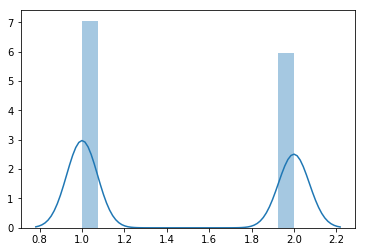

In [40]:
# data visualisation
# 1 dog / cat

#dog_or_cat=train[:,:1]
print (train)
a=[]
i=0
b=0
c=0
for i in range (14992):
    a.append(int(train[i,:1]))
    if (int(train[i,:1]))==1:
        b=b+1
    else :
        c=c+1
print(b)
print(c)
print(a)
sns.distplot(a)

In [10]:
first, second = train.shape

print (first, second)
print (train[0,21], train[0,23])


14993 24
86e1089a3 2


In [ ]:
# data visualisation
# 1 dog / cat

#dog_or_cat=train[:,:1]
print (train)
a=[]
i=0
b=0
c=0
for i in range (14992):
    a.append(int(train[i,:1]))
    if (int(train[i,:1]))==1:
        b=b+1
    else :
        c=c+1
print(b)
print(c)
print(a)
sns.distplot(a)

In [37]:
def getLine(PetId, train):
    '''
    Input: PetId, train
    Output: (1, 24) array of values
    '''
    line = []
    dim1, dim2 = train.shape
    for i in range (dim1):
        if (train[i, 21] == PetId):
            line = train [i,:]        
    return line
#print(getLine('301e16ab9', train))


def getField(PetId, field, train):
    '''
    Input: what do you want
    Output: what you are looking for
    '''
    value = -1000
    if(field=='AdoptionSpeed'):
        value = getLine(PetId, train)[23]
    #...
    elif(field=='PhotoAmt'):
        value = getLine(PetId, train)[22]
        
    elif(field=='Type'):
        value = getLine(PetId, train)[0]
    #elif()
    #...
    else:
        pass
    return value
#print(getField('d24c30b4b', 'AdoptionSpeed', train))
#print(getField('d24c30b4b', 'PhotoAmt', train))


def getAdoptionSpeed(PetId, train):
    '''
    Input: PetId
    Output: AdoptionSpeed
    Need: train = pd.read_csv("train.csv").values first
    '''
    AdoptionSpeed = -1
    return getField(PetId, 'AdoptionSpeed', train)


def getType(PetId, train):
    '''
    Input: PetId
    Output: Type
    Need: train = pd.read_csv("train.csv").values first
    '''
    Type = -1
    return getField(PetId, 'Type', train)


def getPhotoAmt(PetId, train):
    '''
    Input: PetId, train
    Output: PhotoAmt
    '''
    PhotoAmt = -1
    return getField(PetId, 'PhotoAmt', train)

train = pd.read_csv("train.csv").values
#print(getPhotoAmt('d24c30b4b', train))


def moveFromList(PetId, output):
    '''
    input: one image_list, output dir
    move one picture for each animal to another folder
    '''
    os.rename(getImageList(PetId)[1], output + getImageList(PetId)[1][7:])
#moveFromList('5842f1ff5', 'data/train/')

In [ ]:
def picture_and_adopted(PetId, train):
    if 

In [ ]:
for PetId in train[:, 21]:
    
    
    # check picture_and_adopted

In [ ]:
def moveTheDogs():
    ok = 0
    for PetId in train[:, 21]:
        if ((getType(PetId, train)==1) and (getPhotoAmt(PetId, train)>0)):
            try:
                moveFromList(PetId, 'data/train/dog/')
            except:
                pass
    ok = 1
    return ok
    
moveTheDogs()

In [29]:
# get one animal's pictures

def getImageList(number):
    '''
    input: one animal id
    output: image list for this animal
    '''
    image_list = []
    for filename in glob.glob('images/' + number + '*.jpg'): 
        image_list.append(filename) 
    return image_list
#print(getImageList("5842f1ff5")[1][7:])
print(getImageList("5842f1ff5"))
plt.show()

['images/5842f1ff5-4.jpg', 'images/5842f1ff5-1.jpg', 'images/5842f1ff5-6.jpg', 'images/5842f1ff5-7.jpg', 'images/5842f1ff5-5.jpg', 'images/5842f1ff5-8.jpg', 'images/5842f1ff5-2.jpg', 'images/5842f1ff5-3.jpg']


In [ ]:
# model

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
#model.summary()

In [ ]:
# model compile and fit

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=5, batch_size=64)